In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
list_ly=[1,2,3,4,5,6]

In [12]:
rev_t={ly:[] for ly in list_ly}
for ly in list_ly:
    for i in range(16):
        try:
            tmp=np.loadtxt('instances_lx100/ly%d/i%d/f_rev_t.dat'%(ly,i))[1:]
            rev_t[ly]=np.concatenate([rev_t[ly], tmp])
        except:
            print(ly, i)

1 0
1 1
1 2
1 3
1 4


/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: loadtxt: Empty input file: "instances_lx100/ly2/i4/f_rev_t.dat"
  """
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: loadtxt: Empty input file: "instances_lx100/ly5/i3/f_rev_t.dat"
  """


In [13]:
rev_t_Dhalf={ly:[] for ly in list_ly}
for ly in list_ly:
    for i in range(6):
        try:
            tmp=np.loadtxt('instances_lx100_D0.5/ly%d/i%d/f_rev_t.dat'%(ly,i))[1:]
            rev_t_Dhalf[ly]=np.concatenate([rev_t_Dhalf[ly], tmp])
        except:
            print(ly, i)
    print(ly, rev_t_Dhalf[ly].shape[0])

1 271713
2 95580
3 30495
4 10746
5 3599
6 1245


In [14]:
rev_t_Dquarter={ly:[] for ly in list_ly}
for ly in list_ly:
    for i in range(15):
        try:
            tmp=np.loadtxt('instances_lx100_D0.2/ly%d/i%d/f_rev_t.dat'%(ly,i))[1:]
            rev_t_Dquarter[ly]=np.concatenate([rev_t_Dquarter[ly], tmp])
        except:
            print(ly, i)
    print(ly, rev_t_Dquarter[ly].shape[0])

1 571143
2 300234
3 178572
4 126897
5 109136
6 108363


In [15]:
hist, bins = {}, {}
for ly in list_ly:
    hist[ly], bins[ly] = np.histogram(rev_t[ly], bins=100, density=True)

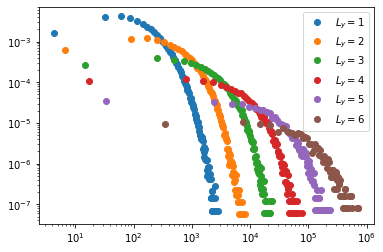

In [16]:
for ly in list_ly:
    plt.loglog(bins[ly][:-1], hist[ly], 'o', label=r'$L_y = %d$'%ly)
plt.legend()

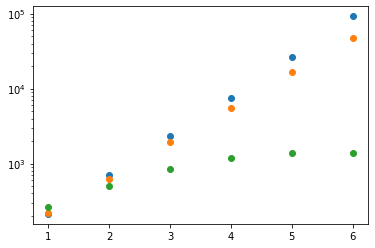

In [25]:
plt.semilogy(list_ly, [np.mean(rev_t[ly]) for ly in list_ly], 'o')
plt.semilogy(list_ly, [np.mean(rev_t_Dhalf[ly]) for ly in list_ly], 'o')
plt.semilogy(list_ly, [np.mean(rev_t_Dquarter[ly]) for ly in list_ly], 'o')

<ErrorbarContainer object of 3 artists>

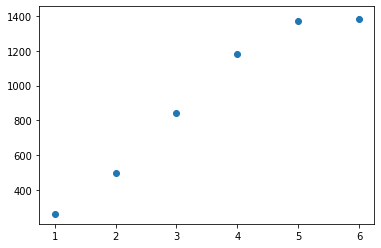

In [18]:
plt.errorbar(list_ly, [np.mean(rev_t_Dquarter[ly]) for ly in list_ly], yerr=3*np.array([np.std(rev_t_Dquarter[ly]) for ly in list_ly])/np.sqrt([rev_t_Dquarter[ly].shape[0] for ly in list_ly]),fmt='o', markersize=6)

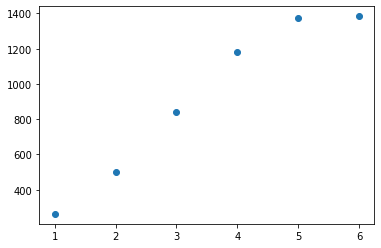

In [19]:
plt.plot(list_ly, [np.mean(rev_t_Dquarter[ly]) for ly in list_ly], 'o')

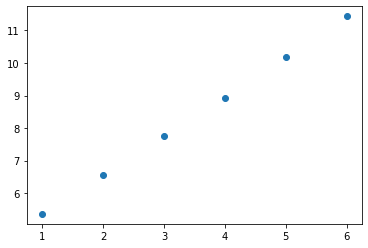

In [20]:
plt.plot(list_ly, np.log([np.mean(rev_t[ly]) for ly in list_ly]), 'o')

In [21]:
hist_q, bins_q = {}, {}
for ly in list_ly:
    hist_q[ly], bins_q[ly] = np.histogram(rev_t_Dquarter[ly], bins=100, density=True)

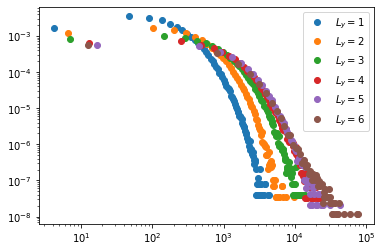

In [22]:
for ly in list_ly:
    plt.loglog(bins_q[ly][:-1], hist_q[ly], 'o', label=r'$L_y = %d$'%ly)
plt.legend()

In [49]:
mag=np.loadtxt('instances_lx100_D0.5/ly%d/i%d/f_mag.dat'%(6,0))

(0, 500000)

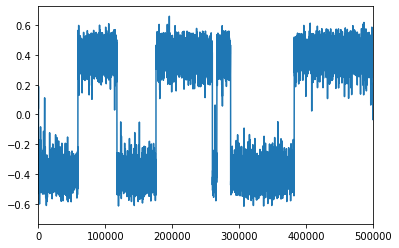

In [51]:
plt.plot(mag[:,0], mag[:, 1])
plt.xlim(0,500000)